#***Exploring the Trends and Patterns in Korean Drama Industry***

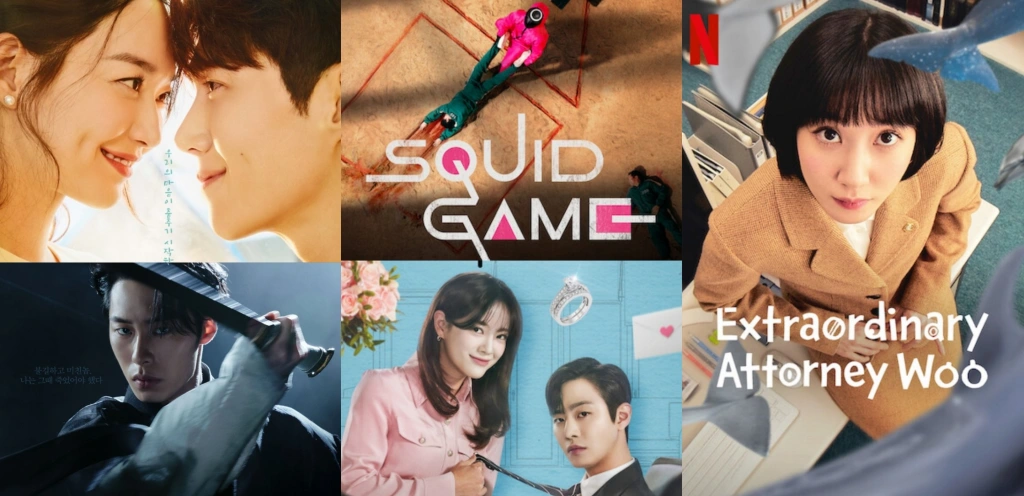

In [6]:
display_png(file="K-drama Wallpaper.png")

#***Introduction***
###*Korean dramas are well received not only by Koreans but also by people all over the world through various themes and interesting elements. Among the elements that make up the drama, not only the content of the drama, but also various factors such as the director of the drama, drama broadcaster, and drama time zone have a lot of influence on the success of the drama. In this project, various information from various famous Korean dramas on the data is used to conduct exploratory data analysis on what elements of the popular drama have.As mentioned earlier, Korean dramas receive a lot of attention and love from all over the world. Considering the data analysis results, it is easier to understand the characteristics of Korean dramas, and better results can be obtained by referring them to drama production.*
###*The top100_kdrama dataset contains information about 100 Korean dramas. Here's what each column represents:*

1. ID: An integer ID for each drama in the dataset.
2. Title: The title of the drama.
3. Genre: The genre(s) of the drama.
4. Tags: Additional tags or keywords associated with the drama.
5. Synopsis: A brief summary or plot description of the drama.
6. Rank: The ranking of the drama in the dataset, based on user ratings.
7. Popularity: The popularity ranking of the drama in the dataset, based on user views.
8. Score: The average user rating score of the drama, on a scale of 0 to 10.
9. Episodes: The number of episodes in the drama.
10. Duration: The duration of each episode, in minutes.
11. Watchers: The number of people who have marked the drama as "watched" on the website where the data was collected.
12. Start_date: The date on which the drama started airing.
13. End_date: The date on which the drama finished airing (if it has finished).
14. Day_aired: The day of the week on which new episodes of the drama were aired.
15. Main.Role: The main cast or lead actors of the drama.

##***Import neccesary library***

In [5]:
suppressWarnings(library("dplyr"))
suppressMessages(library("tidyverse"))
suppressWarnings(library("ggplot2"))
suppressWarnings(library("tidyr"))
suppressWarnings(library("IRdisplay"))
suppressMessages(install.packages("plotrix"))
suppressWarnings(library("plotrix"))

This will prevent any messages or warnings from being displayed in the console during the installation process.

##***Reading Dataset***

In [7]:
# Reading dataset
kdrama<- read.csv("top100_kdrama.csv")
# Preview the first few rows of dataset
head(kdrama)

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main.Role
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Savant Syndrome, Mourning, Tearjerker, Life Lesson, Cleaning And Organizing, Autism Spectrum Disorder, Murder","Han Geu Roo is a 20-year-old with Autism. He works for his father’s business “Move To Heaven,” a company that specializes in crime scene cleanup, where they also collect and arrange items left by deceased people, and deliver them to the bereaved family. When Geu Roo's father dies, Geu Roo's guardianship passes to his uncle, ex-convict Cho Sang Gu, who is a martial arts fighter in underground matches. Per the father's will, Sang Gu must care for and work with Geu Roo in “Move To Heaven” for three months to gain full guardianship and claim the inheritance. Eying money, Sang Gu agrees to the conditions and moves in.",8,94,9.2,10,52,"64,103",5/14/2021,,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
2,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Violence, Friendship, High School, Skilled Fighter, Adapted From A Webtoon, School Setting, Fight","Yeon Shi Eun is a model student who ranks at the top of his high school. Physically, Yeon Shi Eun appears weak, but by using his wits and psychology, he fights against the violence that takes place inside and outside of his school.",12,290,9.1,8,40,"32,415",11/18/2022,,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim Su Gyeom"
3,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lead, Multiple Couples, Comedy, Smart Female Lead, Bromance, Cardiovascular Disease, Workplace Setting","Everyday is extraordinary for five doctors and their patients inside a hospital, where birth, death and everything in between coexist.",14,177,9.1,12,100,"43,574",6/17/2021,9/16/2021,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Yeon Seok, Kim Dae Myung"
4,4,Flower of Evil,"Thriller, Romance, Crime, Melodrama","Deception, Family Secret, Mystery, Suspense, Smart Female Lead, Hidden Personality, Antisocial Personality Disorder, Investigation, Murder, Hidden Identity","Although Baek Hee Sung is hiding a dark secret surrounding his true identity, he has established a happy family life and a successful career. He is a loving husband and doting father to his young daughter. But his perfect façade begins to crumble when his wife, Cha Ji Won, a homicide detective, begins investigating a string of serial murders from 15 years ago. Ji Won notices changes in Hee Sung’s behavior and begins to wonder if he could possibly be hiding something from her.",16,31,9.1,16,70,"94,811",7/29/2020,9/23/2020,"Wednesday, Thursday","Lee Joon Gi, Jang Hee Jin, Moon Chae Won, Seo Hyun Woo"
5,5,Hospital Playlist,"Romance, Life, Drama, Medical","Nice Male Lead, Multiple Mains, Slow Romance, Multiple Couples, Strong Female Lead, Slight Romance, Nice Female Lead, Bromance, Heartfelt, Healing","The stories of people going through their days are seemingly ordinary but actually special at the hospital, a place known as the microcosm of life, where someone is being born and someone's life meets its ending. The five doctors are long-time friends of 20 years who started their undergrad in 1999 in the same medical school and now are colleagues in the same hospital and have a band together.",17,51,9.1,12,90,"81,568",03-12-2020,5/28/2020,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Yeon Seok, Kim Dae Myung"
6,6,Alchemy of Souls,"Action, Historical, Romance, Fantasy","Transmigration, Strong Female Lead, Master-Disciple Relationship, Kind Male Lead, Multiple Mains, Supernatural, Magical Power, Hidden Identity, Body Swap, Elemental Power","Set in a fictional country called Daeho that does not exist in history or on maps, it is about the love and gr

In [8]:
# Preview the last few rows of dataset
tail(kdrama)

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main.Role
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
95,95,Juvenile Justice,"Law, Drama","Hardworking Female Lead, Strong Female Lead, Tough Female Lead, Kind Male Lead, Hardworking Male Lead, Redemption, Runaway Teenager, Violence, Delinquent Supporting Character, Judge Female Lead","Sim Eun Seok is an elite judge with a prickly personality who hates juvenile offenders. After she gets assigned to a local juvenile court, she tries to balance her aversion to minor offenders with firm beliefs on justice and punishment, as she goes out of her way to break custom and administer her own ways of punishing the offenders.",345,476,8.6,10,62,"22,768",2/25/2022,,Friday,"Kim Hye Soo, Lee Sung Min, Kim Mu Yeol, Lee Jung Eun"
96,96,Big Mouth,"Thriller, Mystery, Law, Drama","Suspense, Death, Investigation, Lawyer Male Lead, Murder, Brave Female Lead, Hardship, Greed, Wrongfully Accused, Conspiracy","Park Chang Ho is known since his school days as ""Big Mouth"" because he talks big and promises big things but can not follow it up. He is also an infamous lawyer with a very low rate of success who was hired by a Mayor because of his incompetence. Unfortunately, he was framed as the notorious and mysterious swindler ""Big Mouse"" and sent to prison. Go Mi Ho is Park Chang Ho's loving wife who works as a nurse. She has strong personality and will do anything to prove the innocence of her husband and help solve the case the Mayor has given to her husband. Will Go Mi Ho be successful in proving her husband's innocence? Or, will her investigations lead to opening a can of worms?",350,184,8.6,16,71,"43,057",7/29/2022,9/17/2022,"Friday, Saturday","Lee Jong Suk, Kim Joo Heon, Im Yoon Ah"
97,97,Stranger Season 2,"Thriller, Mystery, Law, Drama","Corruption, Calm Male Lead, Smart Male Lead, Suspense, Emotional Blunting, Power Struggle, Strong Female Lead, Alexithymia, Strong Male Lead, Sassy Female Lead","The prosecutor's office and the police find themselves on opposing sides. The prosecutors, including elite prosecutor Woo Tae Ha, want discretionary power over investigations. Meanwhile, the police, including Choi Bit, try to get the complete investigative authority that is independent of the prosecutor's office. In this tense situation, Prosecutor Hwang Shi Mok and Detective Han Yeo Jin chase after the truth in a hidden case.",361,669,8.6,16,62,"17,630",8/15/2020,10-04-2020,"Saturday, Sunday","Cho Seung Woo, Jeon Hye Jin, Lee Joon Hyuk, Bae Doo Na, Choi Moo Sung, Yoon Se Ah"
98,98,Designated Survivor: 60 Days,"Thriller, Mystery, Drama, Political","Blue House, Power Struggle, Conspiracy, Lying, Terrorism, Social Commentary, Deception, National Intelligence Service, National Assembly, Death","Park Moo Jin is a former professor of chemistry and now holds the Minister of Environment position. He doesn't have ambition, personal beliefs or political sense. One day, the cabinet is gathered in the National Assembly for the president's address. A terror attack takes place, killing many government officials, including the president and ministers. Park Moo Jin is the highest ranking government official left alive. He doesn't want the position, but he must sit as the acting president for 60 days. Park Moo Jin chases after the person or group responsible for the attack as he grows as a national leader.",366,914,8.6,16,74,"13,475",07-01-2019,8/20/2019,"Monday, Tuesday","Ji Jin Hee, Kang Han Na, Lee Joon Hyuk, Son Seok Koo, Heo Joon Ho"
99,99,Cruel City,"Action, Thriller, Romance, Crime","Badass Male Lead, Gang, Bromance, Strong Female Lead, Strong Male Lead, Smart Male Lead, Sismance, Steamy Kiss, Orphan Male Lead, Detective Male Lead","Portrays the cruel life of the drug cartels and the story of revenge for a loved one. Jung Shi Hyun is a newly appointed under-boss of the drug cartel. He lives in the shadows. N

In [9]:
# Check the structure of dataset
str(kdrama)

'data.frame':	100 obs. of  15 variables:
 $ ID        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title     : chr  "Move to Heaven" "Weak Hero Class 1 " "Hospital Playlist Season 2 " "Flower of Evil " ...
 $ Genre     : chr  "Life, Drama" "Action, Youth, Drama" "Romance, Life, Drama, Medical" "Thriller, Romance, Crime, Melodrama" ...
 $ Tags      : chr  "Uncle-Nephew Relationship, Autism, Death, Savant Syndrome, Mourning, Tearjerker, Life Lesson, Cleaning And Orga"| __truncated__ "Smart Male Lead, Bromance, School Bullying, Violence, Friendship, High School, Skilled Fighter, Adapted From A "| __truncated__ "Multiple Mains, Band, Music, Strong Female Lead, Multiple Couples, Comedy, Smart Female Lead, Bromance, Cardiov"| __truncated__ "Deception, Family Secret, Mystery, Suspense, Smart Female Lead, Hidden Personality, Antisocial Personality Diso"| __truncated__ ...
 $ Synopsis  : chr  "Han Geu Roo is a 20-year-old with Autism. He works for his father’s business “Move To Heaven,” a company that s"

In [10]:
# Generating a summary of dataset
summary(kdrama)

       ID            Title              Genre               Tags          
 Min.   :  1.00   Length:100         Length:100         Length:100        
 1st Qu.: 25.75   Class :character   Class :character   Class :character  
 Median : 50.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 50.50                                                           
 3rd Qu.: 75.25                                                           
 Max.   :100.00                                                           
   Synopsis              Rank          Popularity          Score     
 Length:100         Min.   :  8.00   Min.   :   1.00   Min.   :8.60  
 Class :character   1st Qu.: 90.75   1st Qu.:  88.75   1st Qu.:8.60  
 Mode  :character   Median :179.00   Median : 194.50   Median :8.70  
                    Mean   :179.48   Mean   : 319.73   Mean   :8.77  
                    3rd Qu.:262.25   3rd Qu.: 397.50   3rd Qu.:8.90  
                    Max.   :368.00   Max.   :2197.00   

The code "summary(kdrama)" generates basic statistical information for each column in the kdrama dataset, including minimum, maximum, mean, median, and quartiles, as well as information on the length and class of each column. This can help identify potential issues or outliers in the data.

In [11]:
# Print the dimensions of the data frame
dim(kdrama)

[1] 100  15

##***Cleaning Dataset***

In [12]:
# Check for missing values in each column
colSums(is.na(kdrama))

ID      Title      Genre       Tags   Synopsis       Rank Popularity 
         0          0          0          0          0          0          0 
     Score   Episodes   Duration   Watchers Start_date   End_date  Day_aired 
         0          0          0          0          0          0          0 
 Main.Role 
         0

The above code figures out how many missing values there are in each column.

##***Boxplot***

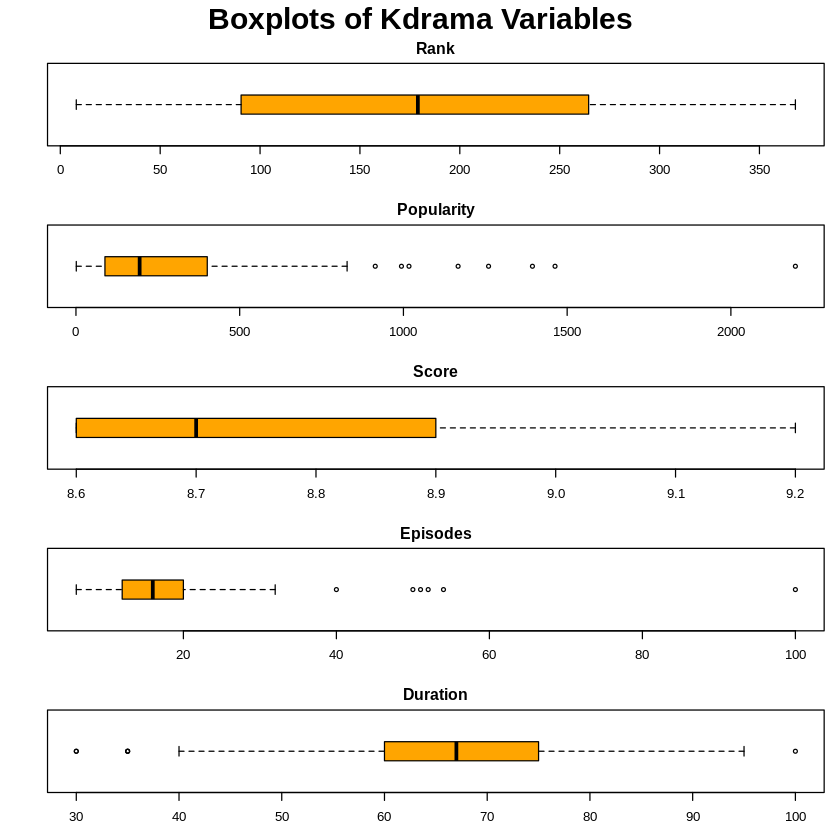

In [13]:
# create a list of column names to plot
columns_to_plot <- c("Rank", "Popularity", "Score", "Episodes", "Duration")

# create subplots for each column
par(mfrow=c(5,1), mar=c(3,3,2,1), oma=c(0,0,2,0))

# loop through each column and create a boxplot
for (i in 1:length(columns_to_plot)) {
  boxplot(kdrama[,columns_to_plot[i]], main=columns_to_plot[i],
          col="orange", ylab="", xlab="",
          horizontal=TRUE, boxwex=0.5)
}

# add main title and adjust layout
mtext("Boxplots of Kdrama Variables", outer=TRUE, cex=1.5, font=2)

The code creates boxplots for different columns in the dataset using a for loop, labeling each plot with the column name. The set of plots is titled "Boxplots of Kdrama Variables" and helps visualize the data distribution, identify unusual data points, and understand the range of each variable quickly.

##***Scatter Plot***

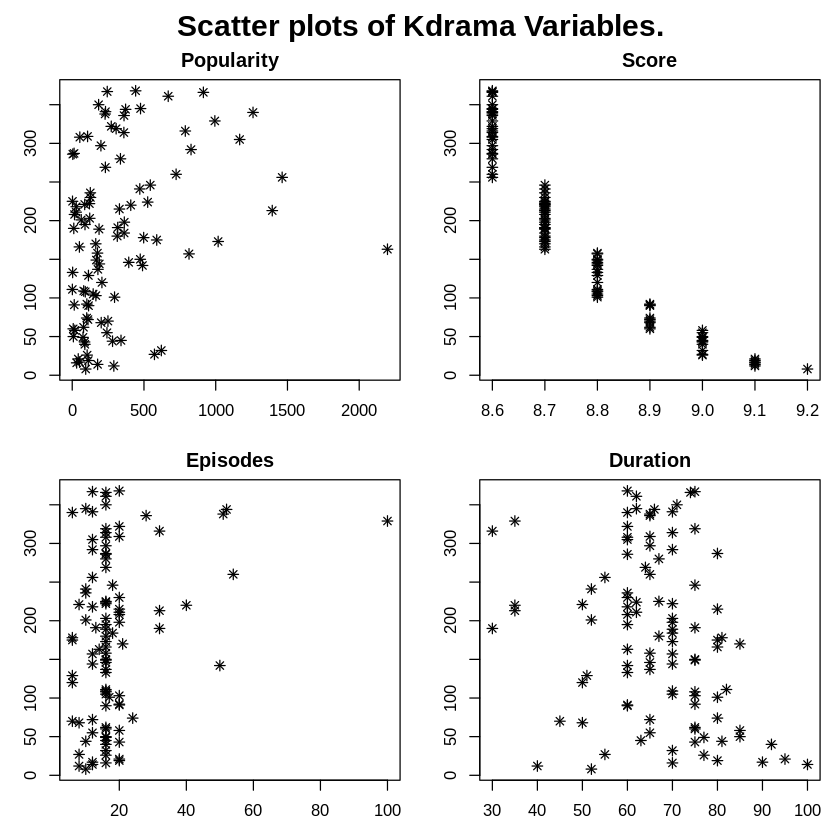

In [14]:
# create a list of column names to plot
columns_to_plot <- c("Popularity", "Score", "Episodes", "Duration")

# create subplots for each column
par(mfrow=c(2,2), mar=c(3,3,2,1), oma=c(0,0,2,0))

# loop through each column and create a scatter plot
for (i in 1:length(columns_to_plot)) {
  plot(kdrama[,columns_to_plot[i]],kdrama$Rank,main=columns_to_plot[i],
          col="black", ylab="", xlab="",pch=8)
}

# add main title and adjust layout
mtext("Scatter plots of Kdrama Variables.", outer=TRUE, cex=1.5, font=2)


The code above makes four scatter plots, one for each of the variables ("Popularity," "Score," "Episodes," and "Duration") compared to "Rank." These plots help us see how these variables relate to the ranking of Kdramas.

##***Histogram***

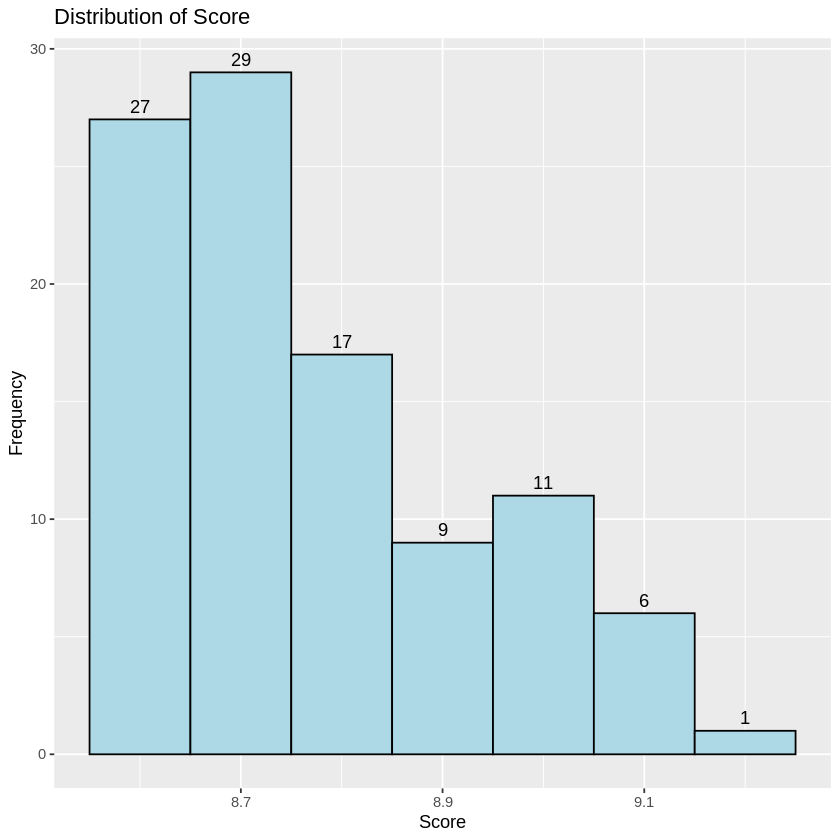

In [15]:
# Explore the distribution of the Score using a histogram
ggplot(kdrama, aes(x = Score)) +
  geom_histogram(binwidth = 0.1, fill = "lightblue", color = "black") +
  ggtitle("Distribution of Score") +
  xlab("Score") +
  ylab("Frequency")+
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5)

This histogram reveals that most scores cluster between 8.5 and 9.0, peaking at approximately 8.8.

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


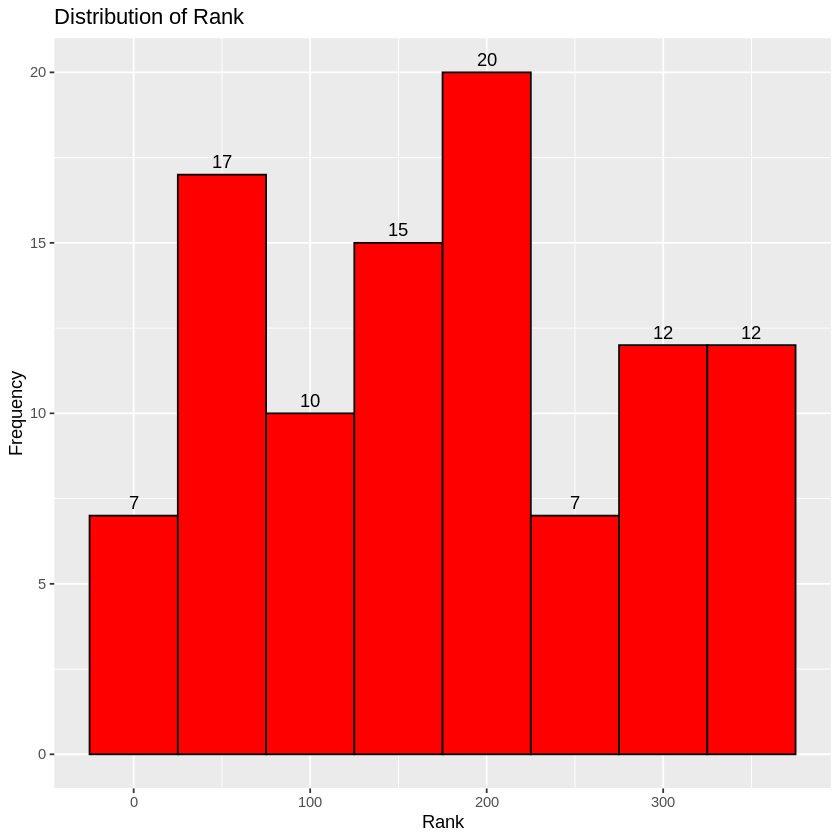

In [16]:
# Explore the distribution of the Rank using a histogram
ggplot(kdrama, aes(x = Rank)) +
  geom_histogram(binwidth = 50, fill = "red", color = "black") +
  ggtitle("Distribution of Rank") +
  xlab("Rank") +
  ylab("Frequency")+
  stat_bin(aes(label = ..count..), geom = "text", binwidth = 50, vjust = -0.5)

The histogram reveals that the majority of dramas have ranks between 100 and 200, with a few exceptions below 50 or above 300.

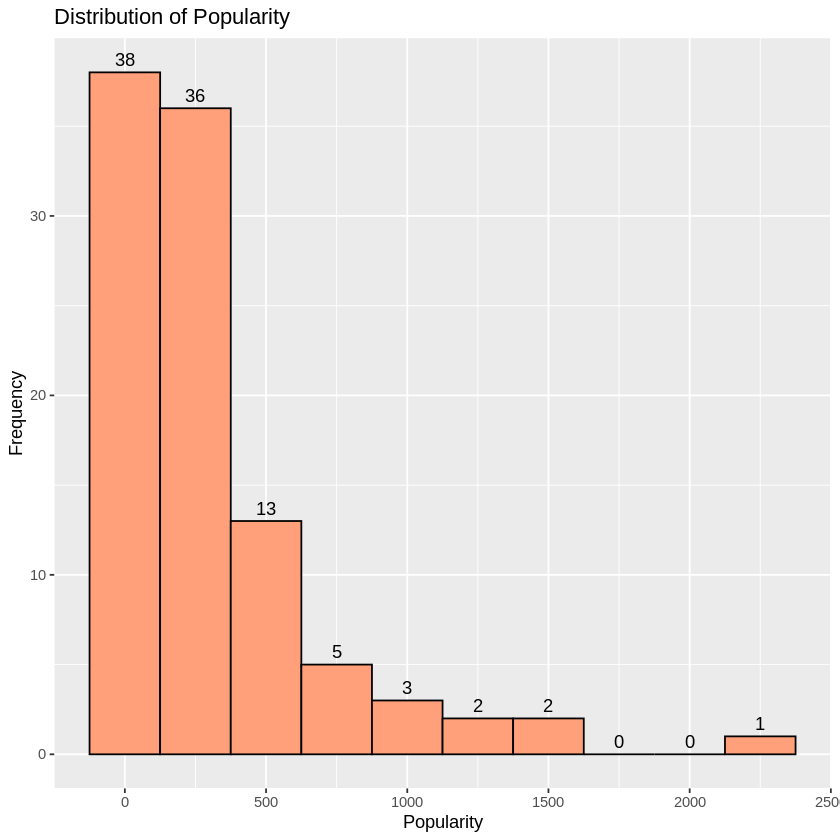

In [17]:
# Explore the distribution of the Popularity using a histogram
ggplot(kdrama, aes(x = Popularity)) +
  geom_histogram(binwidth = 250, fill = "lightsalmon", color = "black") +
  ggtitle("Distribution of Popularity") +
  xlab("Popularity") +
  ylab("Frequency")+
  stat_bin(aes(label = ..count..), geom = "text", binwidth = 250, vjust = -0.5)

The histogram reveals that most dramas have a popularity score of 0 to 500, with a few between 500 and 1000.

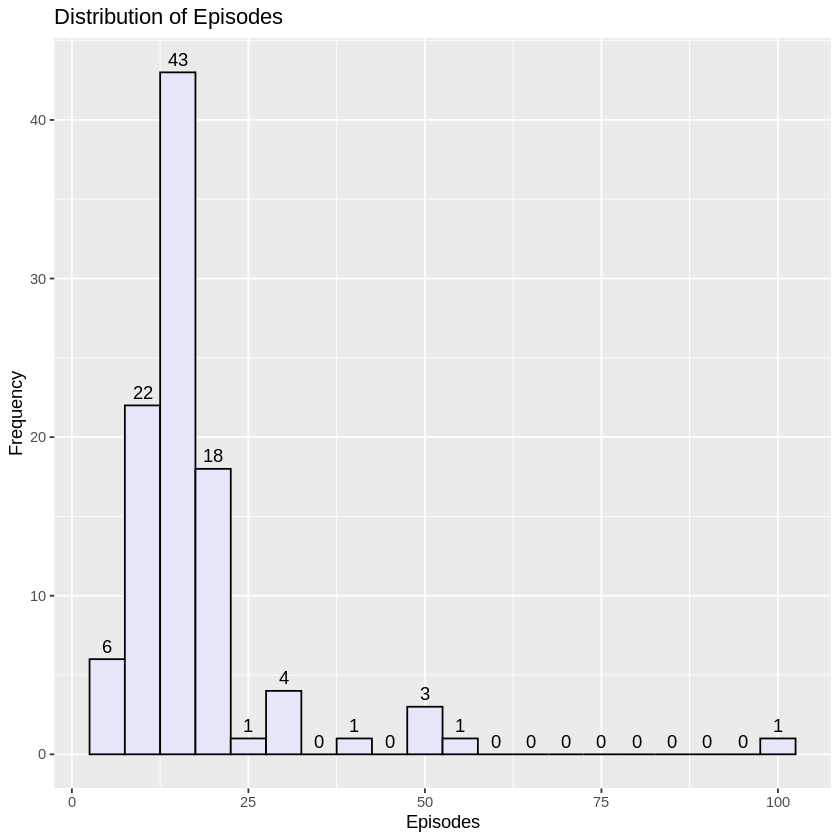

In [18]:
# Explore the distribution of the Episodes using a histogram
ggplot(kdrama, aes(x = Episodes)) +
  geom_histogram(binwidth = 5, fill = "lavender", color = "black") +
  ggtitle("Distribution of Episodes") +
  xlab("Episodes") +
  ylab("Frequency")+
  stat_bin(aes(label = ..count..), geom = "text", binwidth = 5, vjust = -0.5)

The histogram reveals that most kdramas have around 16-20 episodes, and there are few with less than 10 or more than 50 episodes.

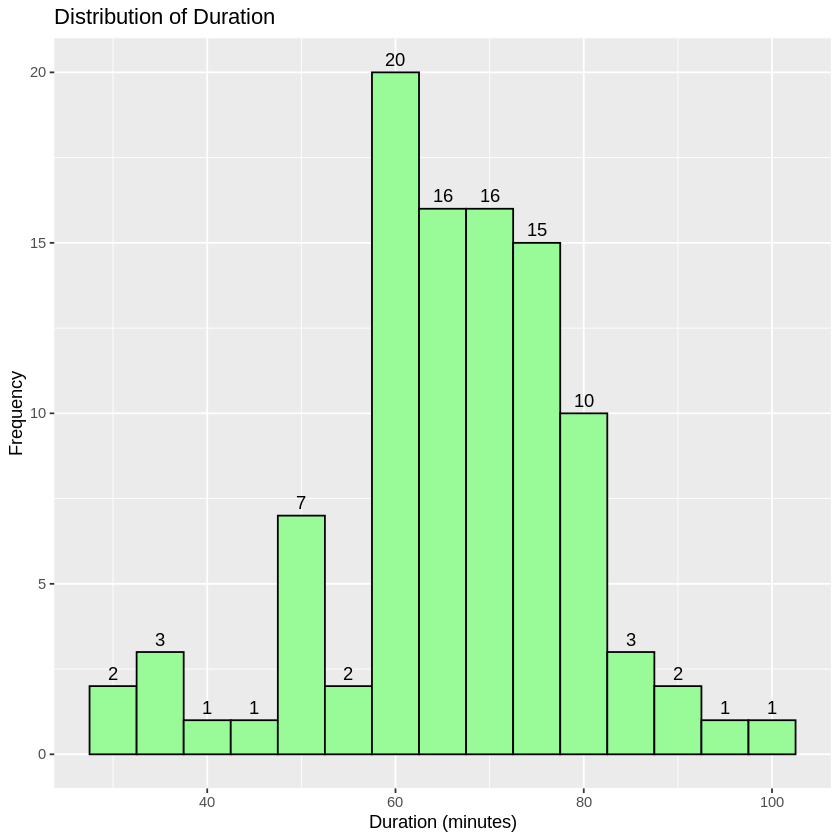

In [19]:
# Explore the distribution of the Duration using a histogram
ggplot(kdrama, aes(x = Duration)) +
  geom_histogram(binwidth = 5, fill = "palegreen", color = "black") +
  ggtitle("Distribution of Duration") +
  xlab("Duration (minutes)") +
  ylab("Frequency")+
  stat_bin(aes(label = ..count..), geom = "text", binwidth = 5, vjust = -0.5)

Most Korean dramas are around 65 minutes, with the highest frequency between 60 to 80 minutes. Few dramas are shorter than 40 minutes or longer than 90 minutes.

##*What are the **most popular genres**?*

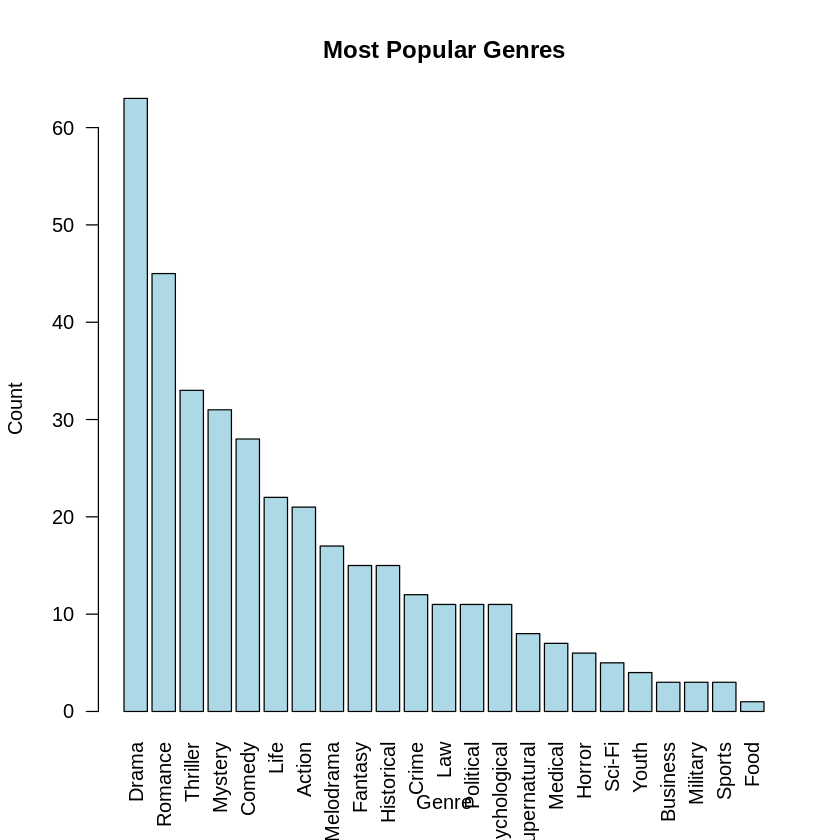

In [20]:
genres_list <- c()
for (genres in kdrama$Genre) {
genres <- strsplit(genres, ", ")[[1]]
genres_list <- c(genres_list, genres)
}
genre_count <- table(genres_list)
top_genres <- head(sort(genre_count, decreasing = TRUE), 30)
# Create barplot
barplot(top_genres, main = "Most Popular Genres", col ="lightblue",
        xlab = "Genre", ylab = "Count",las = 2)

This code makes a bar chart showing the top 30 most popular genres among the top 100 Kdramas. It counts how many times each genre appears, sorts them, and uses "lightblue" bars with labels "Genre" and "Count" to help us see which genres are liked the most by Kdrama viewers.

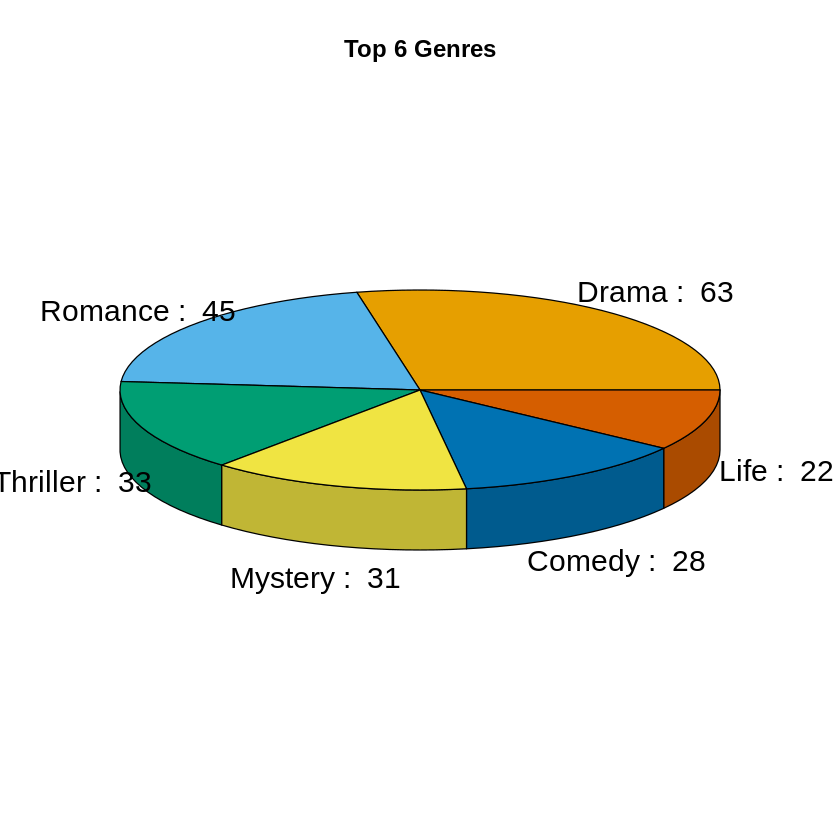

In [21]:
genre_count <- table(genres_list)
top_genres <- head(sort(genre_count, decreasing = TRUE), 6)

# Set colors for pie chart
colors <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00")

# Create pie chart with count labels
pie3D(top_genres, labels = paste(names(top_genres), ": ", top_genres),
    main = "Top 6 Genres", col = colors)

This code makes a pie chart showing the 6 most popular genres in the top 100 Kdramas. This chart quickly reveals the popularity order: Drama, Romance, Comedy, Thriller, Mystery, and Life.

##*Who are the **most casted actors** in top 100 Kdramas?*

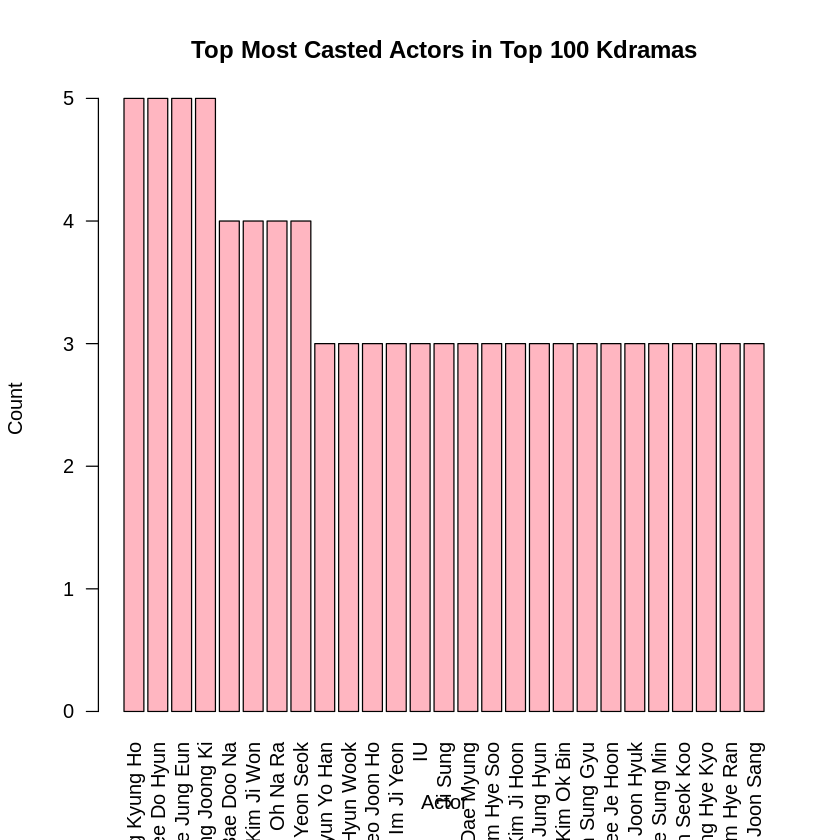

In [22]:
actors_list <- c()
for (actors in kdrama$Main.Role) {
  actors <- str_split(actors, pattern = ", ")[[1]]
  for (actor in actors) {
    actors_list <- c(actors_list, actor)
  }
}
actor_count <- table(actors_list)
top_actors <- head(sort(actor_count, decreasing = TRUE), 27)

barplot(top_actors, main = "Top Most Casted Actors in Top 100 Kdramas", col = "lightpink",
        xlab = "Actor", ylab = "Count",las=2)


The code creates a bar chart of the most frequently cast actors in the top 100 Kdramas by counting the number of appearances of each actor in the main role column and selecting the top 27 actors with the highest counts and the x-axis labels are rotated 90 degrees for better readability.

##*What are the **most popular days** for airing K-Dramas?*

In [23]:
# Create a data frame with day-wise count of Kdramas
days_df <- data.frame(table(unlist(kdrama$Day_aired)))
colnames(days_df) <- c("Day", "Count")

# Separate days separated by commas into multiple rows
days_df <- separate_rows(days_df, Day, sep = ", ")

# Extract only the first word of each day
days_df <- mutate(days_df, Day = str_extract(Day, "\\w+"))

# Sum the count of each day and order by decreasing count
days_df <- days_df %>%
  group_by(Day) %>%
  summarize(Count = sum(Count)) %>%
  arrange(-Count)

days_df

Day,Count
<chr>,<int>
Saturday,48
Friday,34
Sunday,28
Monday,21
Tuesday,21
Thursday,18
Wednesday,16


The code creates a table called "days_df" with two columns: "Day" and "Count" showing how many Kdramas air on each day. It groups the data by day and calculates the total count of Kdramas airing on each day, sorting the result by count.

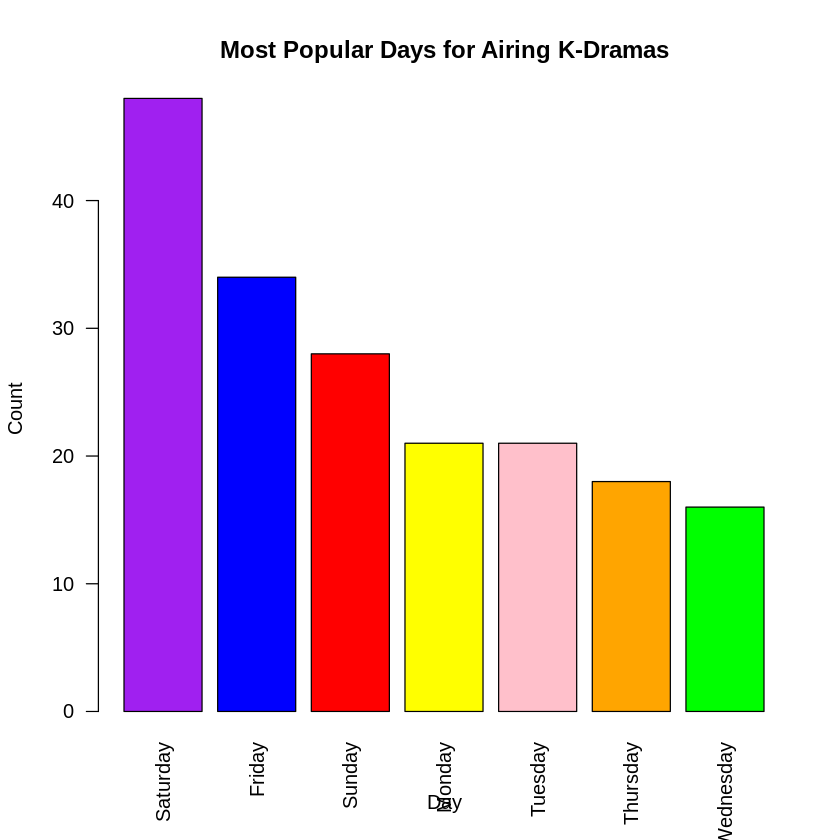

In [24]:
# Set colors for bar chart
colors <- c("purple", "blue", "red", "yellow", "pink", "orange","green")

# Create bar plot
barplot(days_df$Count, main = "Most Popular Days for Airing K-Dramas", col = colors,
        xlab = "Day", ylab = "Count", names.arg = days_df$Day, las = 2)

Most Kdramas are aired on **Saturday and Friday**. It makes sense because most people have more free time on weekends.

##***Conclusions***

####***The analysis shows that Drama, Romance, Thriller, Mystery, Comedy, and Life are the top six genres among Kdrama viewers. Lee Do Hyun, Jung Kyung Ho, Lee Jung Eun, Song Joong Ki, and Bea Doo Na remain in high demand actors in the Kdramas. Saturday and Friday are the most popular days for airing Kdramas. These insights can be valuable for content creators, producers, and marketers in the Kdrama industry to make informed decisions regarding their productions and promotions.***